<a href="https://colab.research.google.com/github/Alexandre77777/neural_networks/blob/main/11.%20%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0%20%D0%B5%D1%81%D1%82%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE%20%D1%8F%D0%B7%D1%8B%D0%BA%D0%B0.%20%D0%91%D0%BE%D0%BB%D1%8C%D1%88%D0%B8%D0%B5%20%D1%8F%D0%B7%D1%8B%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%20(LLM)/%D0%A2%D0%B5%D0%BC%D0%B0_%E2%84%9611_%D0%AD%D0%BC%D0%B1%D0%B5%D0%B4%D0%B4%D0%B8%D0%BD%D0%B3%D0%B8%2C_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Тема №11. Эмбеддинги, word2vec**

## **Особенности текстовых данных**


До этого момента мы рассматривали данные, представленные в виде таблиц (как в классическом машинном обучении) и изображения. Мы изучили, какие модели машинного обучения и типы нейронных сетей лучше всего подходят для работы с этими типами данных. Теперь давайте разберёмся, как обрабатывать текстовые данные, которые имеют свои особенности и требуют другого подхода.

### **Как обычно решаются задачи машинного обучения (на примере классификации)**


1. **Обучающая выборка**: У нас есть набор данных, где каждый объект описан признаками (фичами), а также целевая переменная, которую мы хотим предсказать.
2. **Модель**: Мы создаём нейронную сеть, которая принимает числовые признаки на вход и выдаёт предсказание целевой переменной на выходе.
3. **Настройка гиперпараметров**: Подбираем параметры модели (например, количество слоёв, их размер, число эпох обучения, алгоритмы оптимизации) на валидационной выборке. Обучение проводится на тренировочной выборке, а качество оценивается на валидационной.
4. **Оценка модели**: После настройки гиперпараметров оцениваем качество модели на тестовой выборке. Важно помнить, что нейронная сеть — это **математическая модель**, которая работает с числовыми данными. Она преобразует входные числа с помощью линейных и нелинейных функций, выдавая числовой результат.

### **Особенности работы с текстовыми данными**



Когда мы работаем с таблицами или изображениями, данные уже представлены в числовом виде (векторы, матрицы или тензоры). Однако текстовые данные изначально представлены в виде символов, слов или предложений, которые не являются числами. Чтобы использовать текст в машинном обучении, его нужно преобразовать в числовую форму.

Текстовые данные имеют следующие особенности:
1. **Дискретность**: Текст состоит из последовательности токенов (например, букв, слов или предложений), которые принимают дискретные значения. Токены — это категориальные признаки.
2. **Переменная длина**: Тексты могут быть разной длины, что усложняет их обработку.
3. **Последовательность**: Текст имеет временную структуру — он читается слева направо (или в другом направлении, в зависимости от языка). Это означает, что порядок токенов важен.

### **Как представить текст в числовом виде**



Чтобы подать текстовые данные в нейронную сеть, их нужно закодировать в виде числовой последовательности. Для этого текст разбивается на токены, которые затем преобразуются в числа. Токенами могут быть:
- буквы;
- части слов;
- слова;
- словосочетания;
- предложения.

Таким образом, задача кодирования текста сводится к кодированию токенов. После этого текст представляется как последовательность числовых значений, которые можно использовать для обучения модели.

#### **Почему обработка текста отличается от других типов данных?**









Текст — это уникальный тип данных, который требует учёта его последовательной структуры, дискретности и переменной длины. Эти особенности делают обработку текста более сложной по сравнению с изображениями или табличными данными. В следующих шагах мы разберём, как именно можно преобразовать текст в числовую форму и какие методы для этого используются.

## **Векторные представления слов**

Для работы с текстом в машинном обучении необходимо преобразовать слова и тексты в числовые векторы. Давайте рассмотрим основные подходы к такому преобразованию и как эти векторные представления можно использовать для решения текстовых задач (например, классификации текстов).

### **One-hot encoding (Унитарное кодирование)**


Унитарное кодирование — это самый простой способ представления слов в виде векторов.

Принцип работы следующий:

1. Создаём словарь всех уникальных слов в наших текстах (например, 50 000 слов).
2. Каждому слову сопоставляем вектор длиной, равной размеру словаря (50 000).

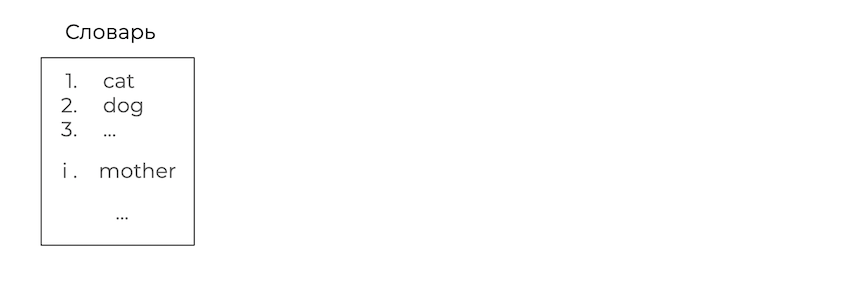

3. В этом векторе все элементы равны нулю, кроме одного — на позиции, соответствующей номеру слова в словаре, стоит единица.


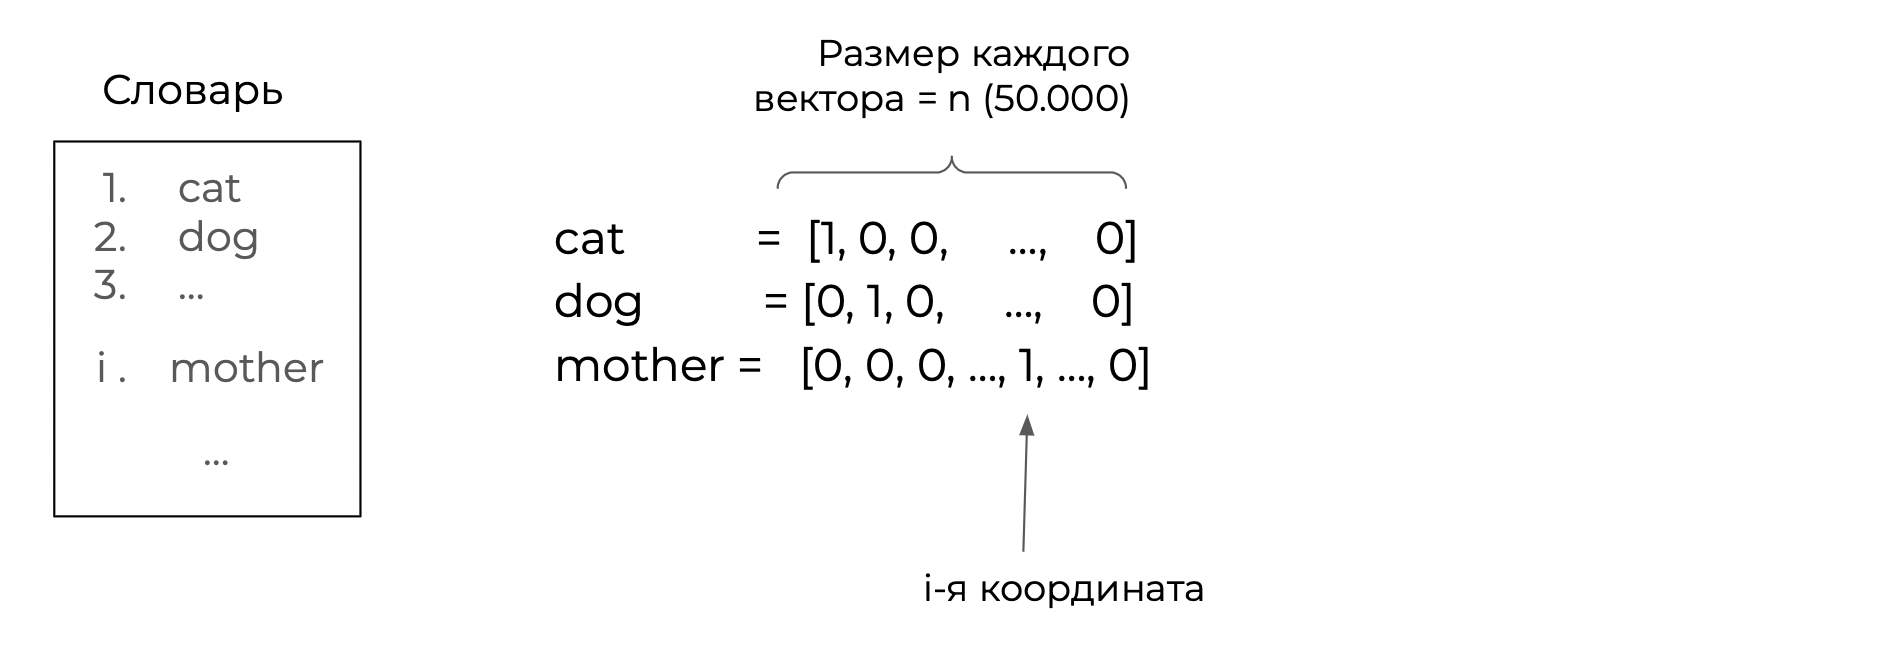

**Например:** для словаря из 5 слов "кот", "собака", "мышь", "дом", "дерево", слово "кот" будет представлено как [1,0,0,0,0], "собака" как [0,1,0,0,0] и т.д.

Однако у этого метода есть серьёзные **недостатки**:

- Векторы никак не отражают смысл слов
- Невозможно измерить семантическую близость слов (все векторы **ортогональны** друг другу)
- Векторы получаются очень **разреженными** (содержат много нулей), что неэффективно с точки зрения памяти
- Словарь имеет фиксированный размер
- Слова, отсутствующие в словаре, невозможно обработать
- При изменении размера словаря все векторы нужно пересчитывать заново

#### **Bag of Words (Мешок слов)**


Как от кодирования отдельных слов перейти к кодированию целого текста?

"Мешок слов" предлагает простое решение:



**Вектор текста = сумма векторов всех слов в тексте**

Например, предложение "кот любит дом" будет представлено как сумма векторов слов "кот", "любит" и "дом".

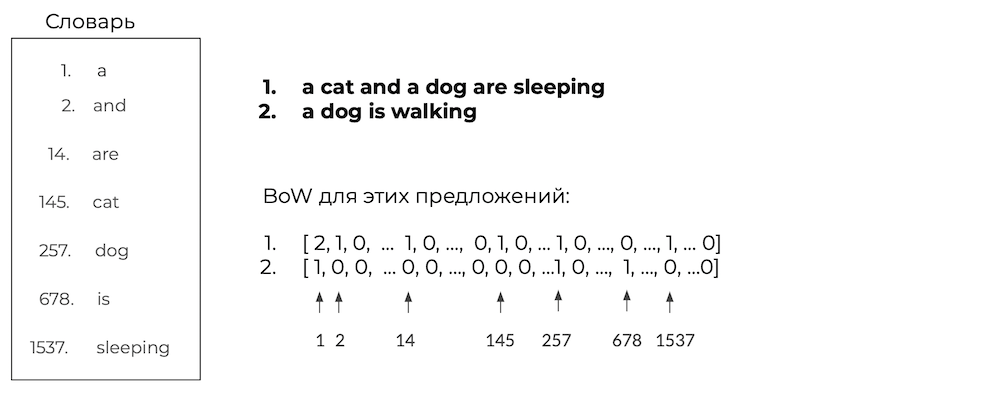

Такое кодирование текста называется ***Bag of Words*** ("мешок слов"). Далее на таком представлении текста можно обучать модель машинного обучения. Например, линейную/логистическую регрессию или даже нейросеть.

Но этот метод также наследует недостатки унитарного кодирования:

- **Не учитывается порядок слов** в тексте (отсюда и название "мешок слов")
- Текст "кот съел мышь" и "мышь съела кота" будут иметь одинаковое представление
- Сохраняется проблема разреженности векторов
- Сохраняются ограничения по размеру словаря

### **Улучшение представлений текстов**


Чтобы улучшить векторные представления, можно:

1. **Уменьшить размерность векторов** с помощью методов вроде анализа главных компонент ( [PCA](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82)) или стохастического вложения соседей с t-распределением ([TSNE](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%B2%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9_%D1%81_t-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC)).

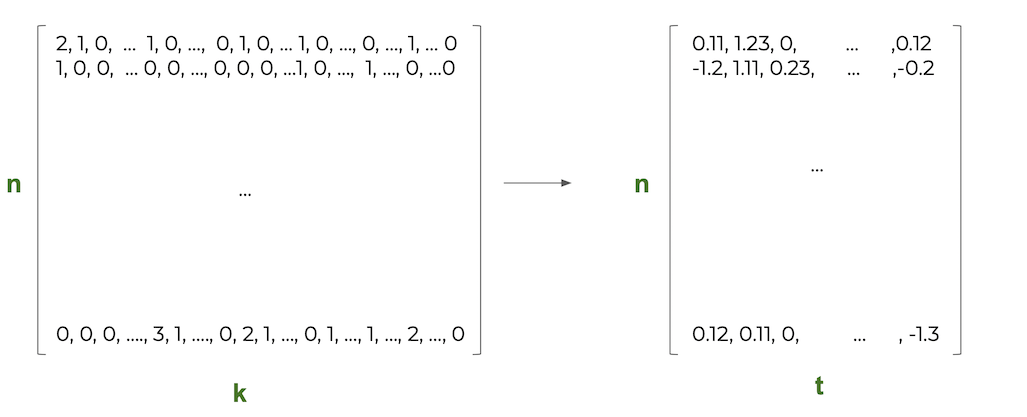

2. **Учесть важность слов**. В стандартном подходе Bag of Words все слова считаются одинаково важными, но это не так. Некоторые слова (например, союзы "и", "а", "но") встречаются почти во всех текстах и не несут особой смысловой нагрузки. Логично присваивать таким словам меньший "вес" в векторном представлении текста.

Именно проблема разной важности слов привела к развитию более сложных методов векторизации текстов, которые лучше учитывают смысловую составляющую языка.

### **Дополнительный пример:**

  **Корпус текстов:**

  - **Документ 1**: "Я люблю машинное обучение"
  - **Документ 2**: "Машинное обучение приносит пользу"
  - **Документ 3**: "Я обучаюсь каждый день"

**Шаги:**

1. **Создание словаря** (все уникальные слова из корпуса):

   ```
   ['я', 'люблю', 'машинное', 'обучение', 'приносит', 'пользу', 'обучаюсь', 'каждый', 'день']
   ```

2. **Построение векторов для каждого документа:**

   - **Документ 1**: [1, 1, 1, 1, 0, 0, 0, 0, 0]
   - **Документ 2**: [0, 0, 1, 1, 1, 1, 0, 0, 0]
   - **Документ 3**: [1, 0, 0, 0, 0, 0, 1, 1, 1]

   Здесь каждая позиция в векторе соответствует слову из словаря, а значение — количеству его вхождений в документе.

## **Продвинутые методы векторного представления слов**


### **Метод Tf-iDF: взвешивание важности слов**


Tf-iDF — это один из наиболее эффективных способов построения информативных векторных представлений текстов. В отличие от простого "мешка слов", этот метод **учитывает важность каждого слова** в контексте всей коллекции документов.



**Принцип работы Tf-iDF:**
- **TF (Term Frequency)** — частота слова в документе. Чем чаще слово встречается в тексте, тем важнее оно для этого текста.
- **IDF (Inverse Document Frequency)** — обратная частота документа. Чем в большем количестве документов встречается слово, тем оно менее уникально и, следовательно, менее важно.



**Формула: Tf-iDF = TF × IDF**

Благодаря такому подходу, **общеупотребительные слова** (предлоги, союзы, частицы) получают низкий вес, а **специфичные термины** — высокий. Например, в медицинском тексте слова "пациент", "диагноз" будут иметь более высокий вес, чем слова "и", "или", "при".



#### **Пример**



**Используем предыдущий корпус:**

  - **Корпус текстов:**

    - **Документ 1**: "Я люблю машинное обучение"
    - **Документ 2**: "Машинное обучение приносит пользу"
    - **Документ 3**: "Я обучаюсь каждый день"

- **Cловарь**: (все уникальные слова из корпуса):

   ```
   ['я', 'люблю', 'машинное', 'обучение', 'приносит', 'пользу', 'обучаюсь', 'каждый', 'день']
   ```

1. **Вычисление TF для слова "машинное" в Документе 1:**

   - TF = количество вхождений слова в документе / общее количество слов в документе.
   - TF("машинное", Документ 1) = 1 / 4 = 0.25

2. **Вычисление IDF для слова "машинное":**

   - Слово "машинное" встречается в 2 из 3 документов.
   - IDF("машинное") = log(3 / 2) ≈ 0.1761

3. **Вычисление TF-IDF для слова "машинное" в Документе 1:**

   - TF-IDF = TF * IDF = 0.25 * 0.1761 ≈ 0.0440

   Аналогично вычисляются значения для остальных слов и документов.

Tf-iDF эффективно применяется для:
- Ранжирования документов в поисковых системах
- Выделения ключевых слов в тексте
- Классификации документов
- Создания векторных представлений для дальнейшего анализа

### **Латентный семантический анализ (LSA)**


Латентный семантический анализ — это метод, позволяющий выявить **скрытые (латентные) связи** между словами и документами. В основе метода лежит математический аппарат сингулярного разложения матриц (SVD).


**Как работает LSA:**

1. **Строим матрицу "документ-слово"**: каждая строка соответствует документу, каждый столбец — слову, а на пересечении стоит частота встречаемости слова в документе.

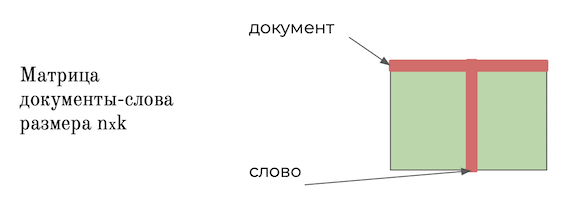

2. **Применяем SVD-разложение**: раскладываем исходную матрицу на произведение трёх матриц:


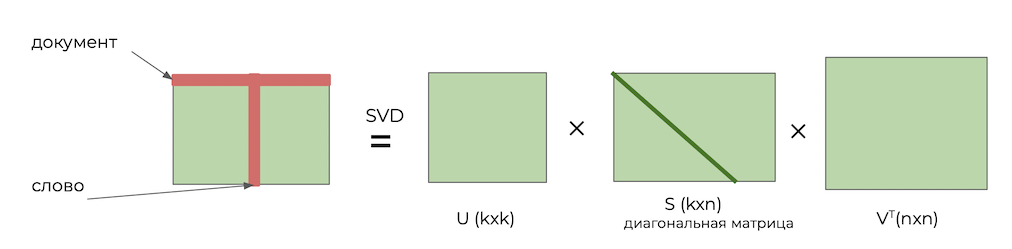

   Где:
   - U — матрица, строки которой соответствуют документам
   - V^T — матрица, столбцы которой соответствуют словам
   - S — диагональная матрица с сингулярными числами в порядке убывания

Оказывается, при таком разложении строки матрицы $U$ можно считать векторами документов, а столбцы матрицы $V^T$ — векторами слов. "Можно считать" означает, что эти векторы действительно будут отражать смысл слов и текстов. Векторы близких по смыслу слов будут близки, векторы далеких по смыслу слов будут далеки по евклидову расстоянию.

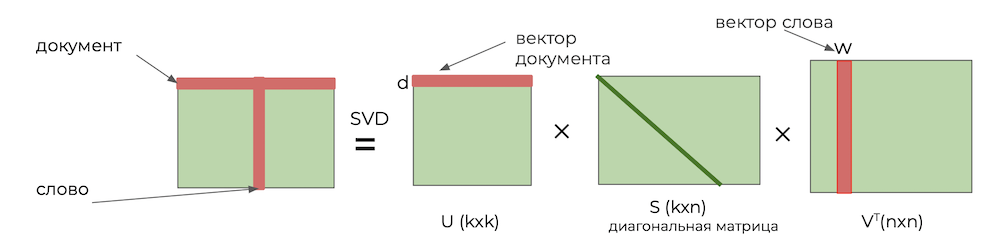

Теперь: у SVD-разложения есть такое свойство: диагональные элементы матрицы $S$ упорядочены в порядке убывания. Они называются ***сингулярными числами***. Понятно, что чем чем меньше число на диагонали матрицы $S$, тем меньший вклад в итогвое произведение дают соответствующие строки и столбцы матриц $U$ и $V^T$.




3. **Снижаем размерность**: оставляем только первые m сингулярных чисел и соответствующие им компоненты матриц U и V^T. Тогда мы получим, что векторы документов и текстов будут меньшей длины $m$. При этом в них сохранится большая часть информации.

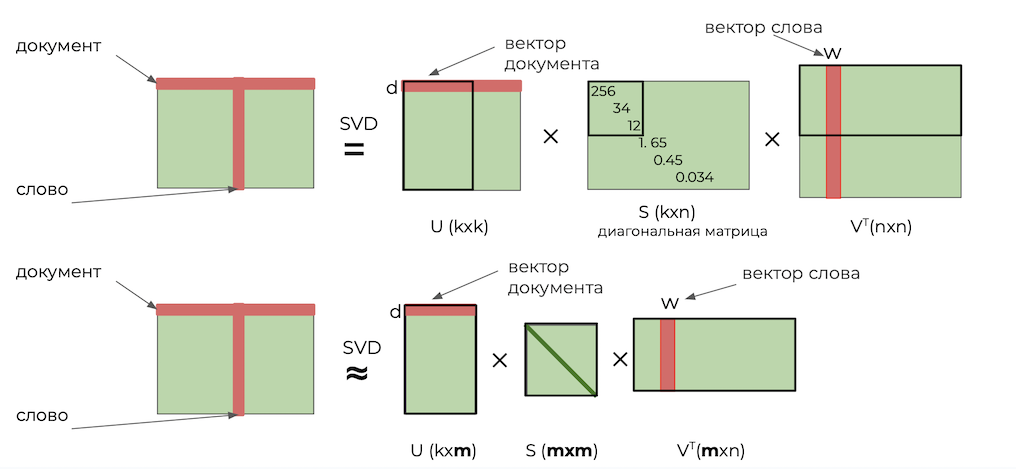

Ниже показана визуализация векторов документов и слов после LSA с понижением размерности векторов до m=2. Видно, что слова и документы разбились на три кластера по темам:

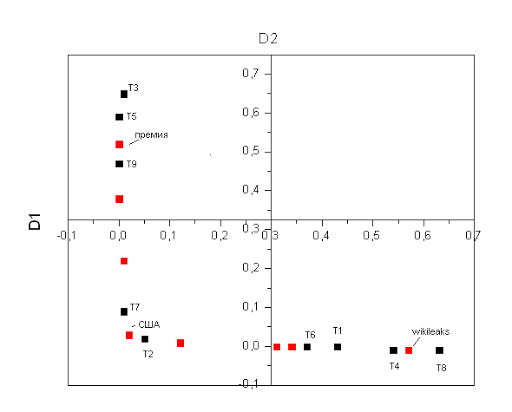

Таким образом, мы получаем **компактные векторные представления** как для слов, так и для документов. В этих представлениях **семантически близкие элементы** находятся близко друг к другу в векторном пространстве.

**Преимущества LSA:**
- Векторы отражают смысловую близость слов и документов
- Можно значительно уменьшить размерность данных без существенной потери информации
- Метод позволяет находить связи между словами даже если они не встречаются вместе в одном документе

**Недостатки LSA:**
- Высокая вычислительная сложность для больших коллекций документов
- Ограниченный словарь (как и в других методах)
- Необходимость пересчитывать все векторы при добавлении новых документов
- Теоретические ограничения модели: метод основан на предположении о нормальном распределении слов, хотя в реальности распределение слов в текстах ближе к пуассоновскому

LSA стал важным шагом в развитии векторных представлений слов и проложил путь к более современным методам, таким как Word2Vec и GloVe, которые ещё лучше улавливают смысловые связи между словами.

## **Контекстные эмбеддинги слов. Word2Vec**

### Контекстные эмбеддинги

Рассмотрим три предложения:

1. Маша ездит на  ____________
2. Колесо ____________ было проколото
3. У ____________ красивая белая рама

Также рассмотрим четыре слова-кандидата на места пропусков в этих предложениях: велосипед, мотоцикл, машина и лошадь. Вопрос: какие из этих слов могут стоять на каких пропусках?

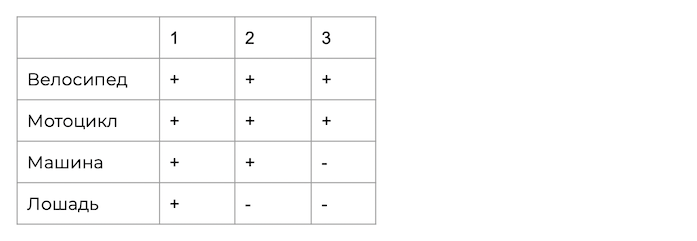

Здесь возникает такая мысль: **смысл слова определяется контекстом, в котором оно может использоваться**. Отсюда возникает идея построения векторных представлений слов на основе контекста.

Давайте подумаем, как можно построить векторы слов на основе контекста. Первая идея приходит такая: пусть у нас есть корпус текстов и словарь размера $n$. Давайте для каждого слова из словаря посчитаем, сколько раз это слово встречается в контексте с каждым другим словом из словаря в этом корпусе текстов. И построим матрицу размера $n \cdot n$, на пересечении $i$-й строки и $j-го$ столбца которой стоит число, отражающее, сколько раз $i$-е слово из словаря встречается в контексте с $j$-м словом в нашем корпусе текстов.

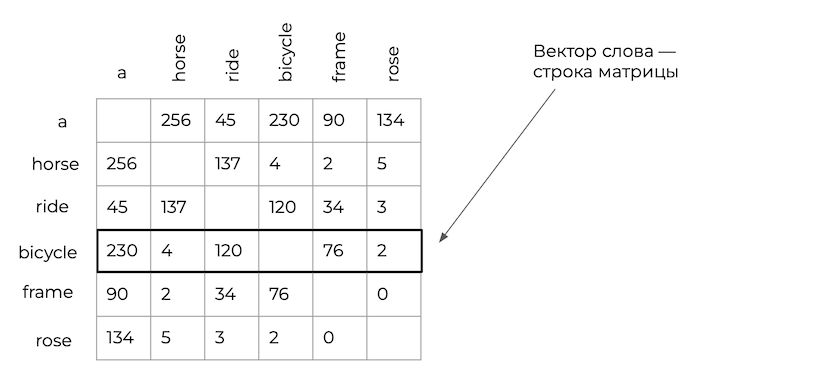

Распишем достоинства и недостатки такого подхода:

**Плюсы:**
- Векторы начинают отражать смысл слов! Их можно сравнивать на схожесть по евклидову расстоянию;

**Недостатки:**
- Векторы все еще довольно разрежены, требуют много лишней памяти;
- Размер словаря ограничен. Слова, не попавшие в словарь, не могут быть обработаны;
- При изменении размера словаря нужно пересчитывать векторы заново;
- Векторы редких слов не очень информативны.


Также заметим, что и для этого подхода можно применить метод понижения размерности (PCA/TSNE):

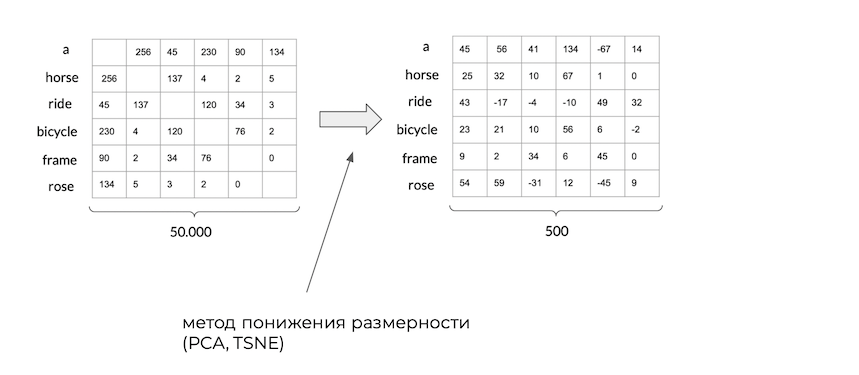

Хорошо, уже получилось лучше: эмбеддинги стали более информативными. Давайте теперь заметим вот что: все, что мы делали до сих пор — на основе каких-то соображений строили векторы/матрицы слов/документов, которые как-то отражали смысл слов/документов.

**А что если попытаться выучить векторы слов/документов?**




### **Word2Vec**

Итак давайте сформулируем, **что мы хотим:**

Мы хотим выучить векторы слов небольшой размерности, которые отражали бы смысл слов: их можно было бы сравнивать между собой с помощью некой метрики.  

Такие выученные векторы мы будем называть **эмбеддингами слов**.

Как мы будем такие векторы учить: мы будем учить нейросеть по слову предсказывать слова, которые могут находиться в контексте (стоять вокруг этого слова).

Нейросеть будет принимать на вход слово $Х$ и выдавать на выходе распределение вероятностей на все слова из словаря. Вероятность слова $Y$ на выходе будет тем больше, чем вероятнее встретить это слово $Y$ в контексте со словом $X$.

Для обучения такой нейросети нам нужен датасет — набор текстов.  Мы будем идти по датасету скользящим окном размера 5, и в каждом положении окна по центральному слову учить нейросеть предсказывать слова, находящиеся в текущем окне.




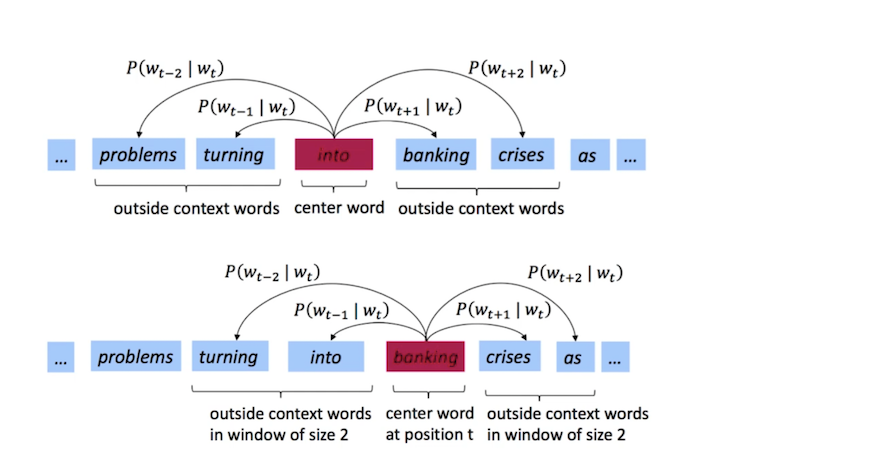

Итак, формальная постановка задачи такая:

- Ставится задача классификации. Количество классов — размер словаря $n$.
- На вход нейросеть принимает слово, выдает $n$ значений — распределение на слова в словаре.
- Лосс-функция — кросс-энтропия между распределением, выданным сетью, и верным распределением (one-hot вектором)  



В качестве нейросети возьмем двуслойную полносвязную нейросеть без функции активации между слоями. Далее мы поймем, почему это важно.

Принимать слово на вход эта нейросеть будет в виде его one-hot вектора. Выдавать на выходе будет вектор длины $n$ с распределением вероятностей на слова из словаря.

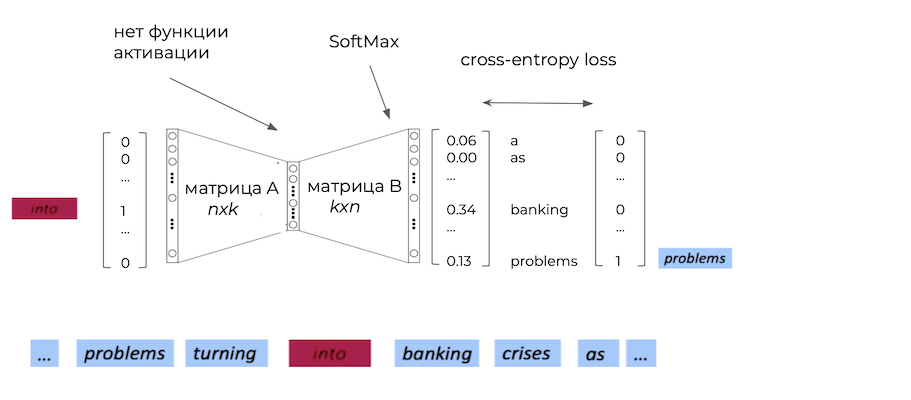

Пусть мы обучили такую нейросеть. Поймем теперь, где в ней находятся эмбеддинги слов.

Для этого изобразим нашу нейросеть немного по-другому:

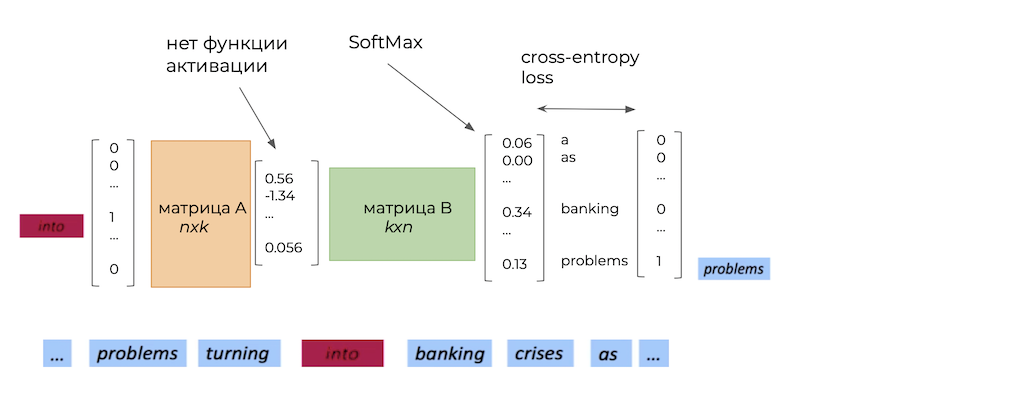

Пусть слово *into* — $i$-е слово в словаре, слово *banking* — $j$-е. Заметим, что при умножении one-hot вектора слова *into* на матрицу $A$ (первый слой сети) полученный результат — это $i$-я строка матрицы $A$. Также заметим, что $j$-й элемент выходного вектора нейросети (соответствующего слову *banking*) — это результат умножения выхода первого слоя на $j$-й столбец матрицы $B$.

Получается, вероятность того, что слова *into* и *banking* могут находиться в одном контексте, по мнению сети — это скалярное произведение $i$-й строки матрицы $A$ и $j$-го столбца матрицы $B$.



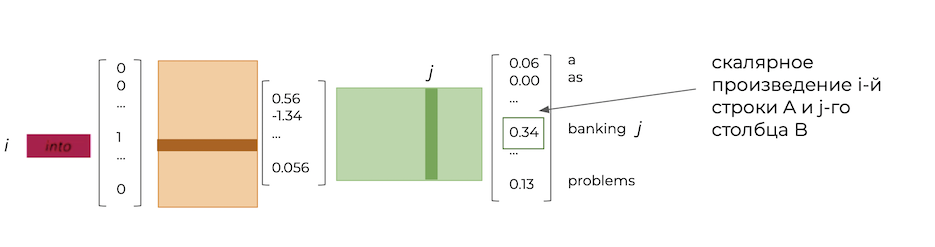

Теперь скажем, что $i$-ую строку матрицы $А$ и $i$-й столбец матрицы $B$ можно считать эмбеддингами $i$-го слова словаря.

Получается, что **нейросеть в процессе обучения выучивает такие векторы слов, чтобы скалярное произведение между векторами двух слов, которые часто используются в контексте, было как можно больше**.

Таким образом, в качестве эмбеддингов слов можно взять строки матрицы $A$ или столбцы матрицы $B$. Эмбеддинги будут размера $k$, который задается выбором размера скрытого слоя сети. Сравнивать эмбеддинги можно по скалярному произведению. Чем оно больше, тем ближе соответствующие слова по смыслу.

Тут становится понятно, почему мы не добавляли функцию активации после первого слоя сети. Если бы была функция активации, $j$-й элемент выходного вектора не был бы скалярным произведением строки и столбца матриц $A$ и $B$.

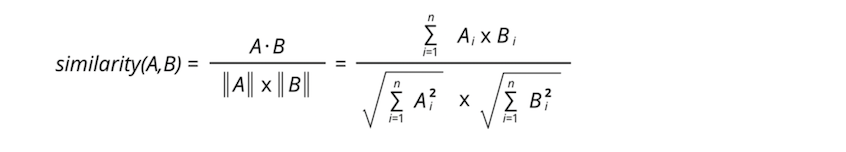

Обсудим достоинства и недостатки такого подхода:

Преимущества:
- Векторы отражают смысл слов;
- Размерность векторов не зависит от размера словаря;
- При добавлении обучающих данных векторы можно дообучить.

Недостатки:
- Фиксированный размер словаря. При изменении размера словаря документов векторы нужно пересчитывать;
- Для редких слов эмбеддинги получаются неоптимальными;
- Слова, имеющие один корень, обрабатываются нейросетью по-разному.
eat, eater, eating


В заключене заметим, что у Word2Vec возможны два варианта:

1. **Skip-Gram** — предсказание слов контекста по центральному слову
2. **CBOW** — предсказание центрального слова по словам контекста

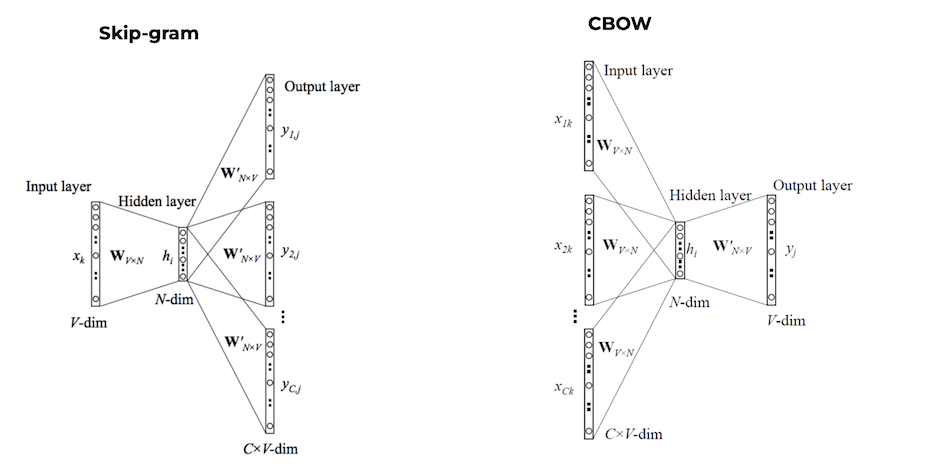

### Улучшения Word2Vec

- **GloVe** (Global Vectors). Он использует статистическую информацию о частоте встречаемости слов и фраз в тексте, чтобы улучшить обучение эмбеддингов редких слов..
- **[FastText](https://neerc.ifmo.ru/wiki/index.php?title=%D0%92%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BD%D0%BE%D0%B5_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D1%82%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81%D0%BB%D0%BE%D0%B2#:~:text=%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C%20fastText%20%D1%81%D1%82%D1%80%D0%BE%D0%B8%D1%82%20%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BD%D1%8B%D0%B5%20%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D1%82%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F,%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D1%82%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B8%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D0%B4%D0%BA%D0%B8%D1%85%20%D1%81%D0%BB%D0%BE%D0%B2.)**. Идея в том, чтобы строить эмбеддинги не для целых слов, а для частей. И собирать эмбеддинг слова из эмбеддингов его частей. Тем самым становится возможно получать эмбеддинги многих слов, которых нет в словаре.

### **Свойства Word2Vec**

На векторах Word2Vec можно проводить векторную арифметику.


**Например:**

  - Вектор("король") - Вектор("мужчина") + Вектор("женщина") ≈ Вектор("королева")
  - Это показывает, что модель улавливает семантические отношения между словами.

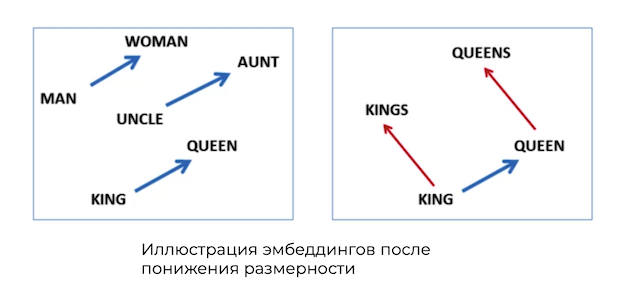

Еще примеры:

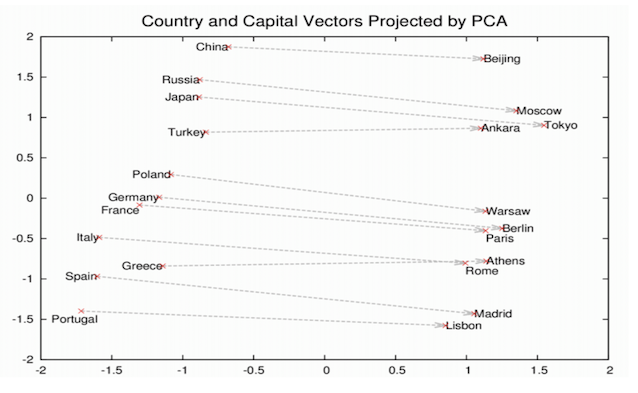

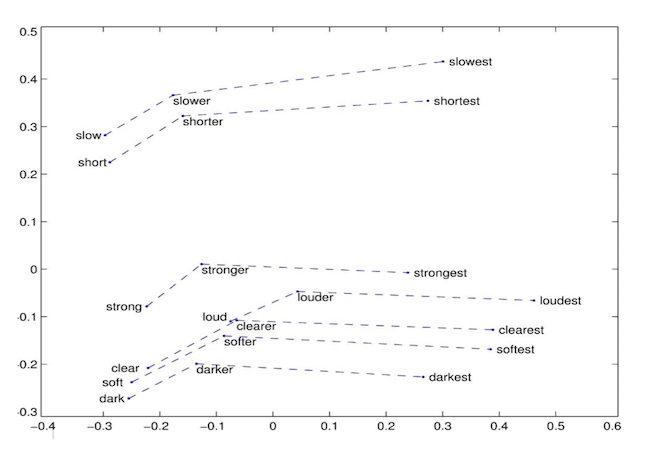

### **Doc2Vec**

**Doc2Vec** — расширение модели Word2Vec, предназначенное для получения векторных представлений целых документов или предложений, учитывая порядок слов и контекст.

- **Пример**

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

corpus = [
    'Я люблю машинное обучение',
    'Машинное обучение приносит пользу',
    'Я обучаюсь каждый день'
]

# Тегирование документов
documents = [TaggedDocument(words=doc.split(), tags=[i]) for i, doc in enumerate(corpus)]

# Обучение модели
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, epochs=100)

# Получение вектора для нового документа
new_doc = 'Сегодня я изучаю машинное обучение'
vector = model.infer_vector(new_doc.split())

print(vector)
# Вывод: векторное представление нового документа

[-0.02482637 -0.0685899  -0.09900071  0.07836594  0.03814064]





**Использование:**

- Векторы документов могут быть использованы для классификации, кластеризации и поиска сходных документов.
- Модель учитывает как содержание, так и структуру документа.

#### **Выводы:**

- Выбор метода векторизации зависит от конкретной задачи и особенностей данных. Простые методы, такие как **Bag of Words** и **TF-IDF**, подходят для базовых задач классификации и кластеризации. Более продвинутые методы, такие как **Word Embeddings** и **Doc2Vec**, позволяют учитывать семантическую информацию и отношения между словами и документами, что улучшает качество моделей в сложных задачах обработки естественного языка.





#### **Дополнительные замечания:**

- **Предварительная обработка текста**: Для всех методов важно проводить нормализацию текста — приведение к нижнему регистру, удаление знаков препинания, стоп-слов и т.д.
- **Выбор размера векторов**: В методах, где задается размерность векторов (например, в Word2Vec, Doc2Vec), выбор правильной размерности важен для баланса между производительностью и точностью.
- **Комбинированные методы**: Иногда полезно комбинировать различные методы векторизации для улучшения результатов, например, объединяя TF-IDF с Word Embeddings.

## **Практические примеры**

Импортируем необходимые библиотеки:

In [ ]:
import string

import numpy as np

from nltk.tokenize import WordPunctTokenizer

from matplotlib import pyplot as plt

from IPython.display import clear_output

Загрузим данные, с которыми будем работать. Это корпус вопросов с сайта Quora.

In [ ]:
# download the data:
!wget https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1 -O ./quora.txt -nc

--2025-04-09 09:52:05--  https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/p0t2dw6oqs6oxpd6zz534/quora.txt?rlkey=bjupppwua4zmd4elz8octecy9&dl=1 [following]
--2025-04-09 09:52:06--  https://www.dropbox.com/scl/fi/p0t2dw6oqs6oxpd6zz534/quora.txt?rlkey=bjupppwua4zmd4elz8octecy9&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbf54dda2c1b325c3f23e9d4ee9.dl.dropboxusercontent.com/cd/0/inline/CndlBdC-iiKTbcblbR2U_5fd8XhTWwZUWKKVhvJHhCp9V0FphXZ47nKq4YV9N8BbB0nwQYfu1McJmjcP9i62_9JwFvmFi6MFZ3RMOdZg-aFMwTcHI1N2sd9CYQXZbbG9QOY/file?dl=1# [following]
--2025-04-09 09:52:06--  https://ucbf54dda2c1b325c3f23e9d4ee9.dl.dropboxusercontent.com/cd/0/inline/CndlBdC-iiK

Посмотрим на элемент данных:

In [ ]:
data = list(open("./quora.txt", encoding="utf-8"))                                # видим вопрос №55 из quora
data[55]

'What are all the pros and cons of having dual citizenship?\n'

Произведем токенизацию и базовую предобработку:

In [ ]:
tokenizer = WordPunctTokenizer()                                                  # из NLTK (Natural Language Toolkit) для работы с
                                                                                  # естественным языком "дергаем" WordPunctTokenizer(), который
                                                                                  # бьет предложение на слова и знаки препинания
print(tokenizer.tokenize(data[55]))
data_tok = [tokenizer.tokenize(x.lower()) for x in data]                          # приведем все к нижнему регистру

['What', 'are', 'all', 'the', 'pros', 'and', 'cons', 'of', 'having', 'dual', 'citizenship', '?']


In [ ]:
len(data)                                                                         # видим, что в данных 537272 предложения

537272

Для начала, обучим word2vec на доступном наборе данных. Строить для этого модель вручную не понадобится, она уже доступна в `gensim`.

In [ ]:
from gensim.models import Word2Vec
model_obj = Word2Vec(data_tok,
                 vector_size=32,                                                  # для каждого слова строится 32-мерный вектор
                 min_count=5,                                                     # рассматриваем только слова, встречающиеся как минимум 5 раз в тексте
                 window=5)                                                        # определяем контекст окном в 5 слов около слова-таргета
model = model_obj.wv                                                              # сохраняем соответствие слов и их векторов в переменную model

**Примечание:** обратите внимание, что в реализации `Word2Vec` из библиотеки `gensim` в параметре `window` указывается не полный размер окна, а максимальное растояние (в словах) от центрального слова окна до слова, которое мы хотим предсказать. Например, если мы укажем параметр `window=2` и будем строить обучающую выборку для предолжения "Съешь ещё этих мягких французских булок, да выпей чаю", то для слова **мягких** в обучающую выборку попадут следующие пары: (мягких, ещё), (мягких, этих), (мягких, французских), (мягких, булок).

Теперь нам доступны векторы для любого слова из словаря:

In [ ]:
model.get_vector('cat')                                                          # рассмотрим вектор для слова 'cat'

array([-3.5631819 ,  1.0918669 , -0.8742508 , -0.99347484, -1.430906  ,
        0.6366659 , -1.7592809 , -2.675177  , -1.3768494 ,  2.665527  ,
        1.5751318 , -2.682338  , -1.4218243 ,  1.6961786 ,  2.371728  ,
       -3.617359  , -2.9813735 ,  0.11653395, -1.9565647 , -1.3708756 ,
        1.8075705 ,  1.6682189 , -1.5121067 , -0.03990271,  0.690471  ,
        1.6506522 , -2.275169  , -0.45736673, -0.7651789 ,  1.524998  ,
        2.0204737 , -0.69962317], dtype=float32)

Так как слова представлены векторами, теперь можно вычислить расстояние (или некоторую меру схожести) между ними. Например, можно оценить, какие слова наиболее близки к заданному.

In [ ]:
model.most_similar('parent')                                                      # most_similar() - метод, который берет слово, находит для него
                                                                                  # вектор, ищет ближайшие к нему векторы по какой-то мере близости
                                                                                  # тут используется косинусная мера близости

[('child', 0.9181265234947205),
 ('affair', 0.8672084212303162),
 ('mother', 0.8464205861091614),
 ('sibling', 0.8411386609077454),
 ('kid', 0.829600989818573),
 ('lover', 0.8295760154724121),
 ('partner', 0.8194788098335266),
 ('father', 0.8181169629096985),
 ('siblings', 0.8100043535232544),
 ('wife', 0.8080825209617615)]

### Работа с предобученными векторными представлениями слов

Для получения качественных эмбеддингов стоит использовать большие наборы данных. Также бывает полезным использовать данные из определенной предметной области. Конечно, обучение занимает значительное время, поэтому зачастую используются предобученные эмбеддинги для слов.

Загрузим предобученные эмбеддинги небольшой размерности (25). Они были обучены на данных из Twitter.

In [ ]:
import gensim.downloader as api
model = api.load('glove-twitter-25')                                              # здесь используются векторы GloVe

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
model.most_similar(positive=["лето"])

[('утро', 0.8916537761688232),
 ('весна', 0.878777265548706),
 ('зима', 0.8693447113037109),
 ('скоро', 0.8552830219268799),
 ('солнце', 0.8396058082580566),
 ('ночь', 0.8204128742218018),
 ('надеюсь', 0.8200833797454834),
 ('воскресенье', 0.8176007270812988),
 ('летом', 0.8077778816223145),
 ('солнышко', 0.8064454793930054)]

#### Визуализация векторных представлений слов

В данный момент каждое слово представлено вектором размерности 25. Для визуализации слов нам понадобится техника снижения размерности. Для простоты можно воспользоваться методом главных компонент [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [ ]:
len(model.key_to_index.keys())

1193514

In [ ]:
model.sort_by_descending_frequency()                                              # выберем наиболее часто встречающиеся слова

In [ ]:
words = list(model.key_to_index.keys())[:1000]                                    # берем первую тысячу слов и для нее построим векторы

print(words[::100])

word_vectors = np.asarray([model[x] for x in words])

['<user>', '_', 'please', 'apa', 'justin', 'text', 'hari', 'playing', 'once', 'sei']


In [ ]:
# построим для всего этого какое-то (а именно двумерное) маломерное представление
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(2)

scaler = StandardScaler()

word_vectors_pca = scaler.fit_transform(word_vectors)
word_vectors_pca = pca.fit_transform(word_vectors_pca)

Для визуализации обратимся к замечательной библиотеке `bokeh`. Графики являются интерактивными.

In [ ]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x,
                                       'y' : y,
                                       'color': color, **kwargs })                # ColumnDataSource все по колонкам
                                                                                  # x, y, цвета поданы извне

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)       # рисуем фигуру, которая динамически будет перешкалироваться
    fig.scatter('x', 'y', size=radius, color='color',
                alpha=alpha, source=data_source)                                  # рисуем точками

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

In [ ]:
draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=words)         # можно увидеть, что слова разбились по языкам на несколько кучек

figure(id='p1004', ...)

Как видим, образовалось несколько кластеров ("кучек", или же скоплений). Каждая из них обладает некоторой отличительной чертой: смыслом входящих в нее слов, языком или каким-либо еще общим свойством. График интерактивный.

#### Снижение размерности с помощью UMAP
Метод главных компонент – замечательная техника, но он позволяет улавливать лишь линейные зависимости в данных. Обратимся к технике [UMAP](https://habr.com/ru/company/newprolab/blog/350584/), которая учитывает соседей заданных точек. По ссылке выше можно прочитать развернутое описание этой техники.

In [ ]:
! pip install umap-learn
import umap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=03f1d97b4f6d5aa79664a7e664f60969e264c6084811b7a82d949249f9e4b2af
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
embedding = umap.UMAP(n_neighbors=5).fit_transform(word_vectors)                  # будем смотреть на 5 соседей
                                                                                  # fit_transform(word_vectors) - все исходные векторы преобразовали

In [ ]:
draw_vectors(embedding[:, 0], embedding[:, 1], token=words)                       # теперь получились гораздо более ярко выраженные кучки,
                                                                                  # которые между собой не связаны
                                                                                  # появился русский язык

figure(id='p1053', ...)

Как можно видеть, слова образуют гораздо более четкие группы, различимые невооруженным глазом. График - интерактивный, при наведении курсора на точку указывается, какому слову она соответствует.
Можно видеть, что слова различных языков стоят рядом. Для английского языка (его слов больше всего в наших данных) видно несколько подгрупп.

#### Визуализация фраз

В завершение построим векторные представления не только слов, но и целых фраз. Для простоты воспользуемся подходом, аналогичным мешку слов (BoW): мешком эмбеддингов. Каждую фразу представим в виде усредненного эмбеддинга всех входящих в нее слов.

In [ ]:
def get_phrase_embedding(phrase):                                                 # на вход приходит фраза - последовательность токенов
                                                                                  # переменной длины
    """
    Convert phrase to a vector by aggregating it's word embeddings.
    """
    vector = np.zeros([model.vector_size], dtype='float32')                       # изначально имеем вектор из нулей
    phrase_tokenized = tokenizer.tokenize(phrase.lower())                         # теперь для каждой фразы прогоняем токенизатор
    phrase_vectors = [model[x] for x in phrase_tokenized if model.has_index_for(x)] # для каждого слова получаем вектор, укладываем их вместе

    if len(phrase_vectors) != 0:
        vector = np.mean(phrase_vectors, axis=0)                                  # затем либо усредняем, именно операция усреднения позволяет нам
                                                                                  # избавиться от переменной длины текста (получаем из большой длины
                                                                                  # фиксированный вектор),
    return vector                                                                 # либо возвращаем вектор из нулей, если ничего нет

In [ ]:
data[402687]

'What gift should I give to my girlfriend on her birthday?\n'

In [ ]:
get_phrase_embedding(data[402687])

array([-0.18204999,  0.30953574,  0.20861094,  0.07982156, -0.22565515,
       -0.33001748,  1.2495784 ,  0.13134292, -0.33788875,  0.06196944,
       -0.231793  ,  0.09389219, -4.9685497 , -0.23611419, -0.32609668,
       -0.092073  ,  0.4407505 , -0.75413746, -0.5389092 , -0.184752  ,
        0.07867809,  0.20018655, -0.16202375,  0.30375698, -0.41255665],
      dtype=float32)

In [ ]:
vector = get_phrase_embedding("Hello, today we speak about word vectors!")        # можем получить вектор абсолютно для любого предложения
                                                                                  # т.е. не только для данных из обучающей выборки
                                                                                  # т.к. векторы уже были предобучены

In [ ]:
vector

array([ 0.30748555, -0.05400768, -0.18464424, -0.13607563, -0.23507245,
       -0.04939345,  1.1183112 ,  0.05371887, -0.32848334,  0.19103   ,
       -0.21656999,  0.19023776, -3.84866   , -0.257967  ,  0.21277945,
        0.00940701,  0.19321555, -0.32837075, -0.29023   , -0.09518776,
       -0.1398064 , -0.06628689, -0.53203714,  0.3393022 ,  0.14804935],
      dtype=float32)

Дополнительно можно попробовать сделать следующее:
* Воспользоваться t-SNE вместо UMAP (требует гораздо больше времени на больших выборках)
* Визуализировать весь набор данных, а не только его часть
* Воспользоваться другими эмбеддингами из `gensim` "model zoo": `gensim.downloader.info()`

In [ ]:
from gensim import downloader
downloader.info()['models']

{'fasttext-wiki-news-subwords-300': {'num_records': 999999,
  'file_size': 1005007116,
  'base_dataset': 'Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens)',
  'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/fasttext-wiki-news-subwords-300/__init__.py',
  'license': 'https://creativecommons.org/licenses/by-sa/3.0/',
  'parameters': {'dimension': 300},
  'description': '1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens).',
  'read_more': ['https://fasttext.cc/docs/en/english-vectors.html',
   'https://arxiv.org/abs/1712.09405',
   'https://arxiv.org/abs/1607.01759'],
  'checksum': 'de2bb3a20c46ce65c9c131e1ad9a77af',
  'file_name': 'fasttext-wiki-news-subwords-300.gz',
  'parts': 1},
 'conceptnet-numberbatch-17-06-300': {'num_records': 1917247,
  'file_size': 1225497562,
  'base_dataset': 'ConceptNet, word2vec, GloVe, and OpenSubtitles 2016',
  'reader_code': 'https:/